In [8]:
from Two_class_model import classif_get_data, classif_training, predict_classes

2022-06-06 16:32:15.106174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 16:32:15.106770: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
!pwd

/home/theo/code/theopanel/bva/notebooks


In [20]:
cd ./bva

/home/theo/code/theopanel/bva/bva


In [29]:
from Two_class_model import predict_classes
import numpy as np

In [23]:
y_pred = predict_classes("/home/theo/code/theopanel/bva/bva/data/hitnet_match9_pred_final.csv",
               "/home/theo/code/theopanel/bva/bva/data/match9_1_07_11_predict.csv",
                       "/home/theo/code/theopanel/bva/bva/data/match9_1_07_11_details.csv",
                       "/home/theo/code/theopanel/bva/bva/data/match9_1_07_11_players.csv",
                       "/home/theo/code/theopanel/bva/bva/models/2class")

2022-06-06 20:51:36.852116: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-06 20:51:36.853357: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PORT-TPANEL): /proc/driver/nvidia/version does not exist
2022-06-06 20:51:36.864421: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-06 20:51:40.884932: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-06-06 20:51:42.775522: W tensorflow/core/common_runtime/graph_construc

In [33]:
from preprocess import add_stroke_cat_to_dataset

In [34]:
clean_df = pd.read_csv("/home/theo/code/theopanel/bva/bva/data/clean_dataset.csv")
df = add_stroke_cat_to_dataset(clean_df)

In [45]:
match = df[df["video_path"]=="match9/rally_video/1_07_11.mp4"]
truth = match[match["stroke_cat"]!="no_hit"]["stroke_cat"]

In [56]:
prev = np.where(np.argmax(y_pred, axis=1)==0, "att_prev", "def_prev")

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

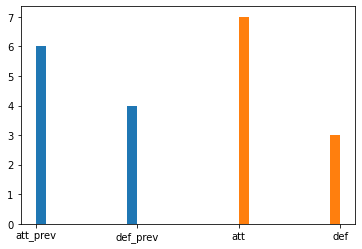

In [57]:
plt.hist(prev)
plt.hist(truth)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

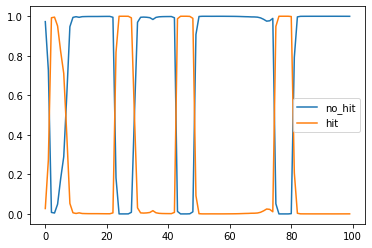

In [16]:
df = pd.read_csv("hitnet_match9_pred.csv")
df
plt.plot(df["0"][:100], label="no_hit")
plt.plot(df["1"][:100], label="hit")
plt.legend()

In [12]:
model, history, test_dict = classif_training()

2022-06-06 16:40:04.833255: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-06 16:40:04.833972: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PORT-TPANEL): /proc/driver/nvidia/version does not exist
2022-06-06 16:40:04.852201: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
74/74 [==============================] - 48s 339ms/step - loss: 0.6515 - accuracy: 0.5964 - val_loss: 0.6022 - val_accuracy: 0.6382
Epoch 2/500
74/74 [==============================] - 13s 182ms/step - loss: 0.5552 - accuracy: 0.7159 - val_loss: 0.5542 - val_accuracy: 0.6587
Epoch 3/500
74/74 [==============================] - 12s 157ms/step - loss: 0.4727 - accuracy: 0.7807 - val_loss: 0.3780 - val_accuracy: 0.8601
Epoch 4/500
74/74 [==============================] - 12s 166ms/step - loss: 0.4505 - accuracy: 0.7892 - val_loss: 0.4253 - val_accuracy: 0.7986
Epoch 5/500
74/74 [==============================] - 12s 167ms/step - loss: 0.4229 - accuracy: 0.8131 - val_loss: 0.3562 - val_accuracy: 0.8328
Epoch 6/500
74/74 [==============================] - 12s 162ms/step - loss: 0.4113 - accuracy: 0.7927 - val_loss: 0.3538 - val_accuracy: 0.8703
Epoch 7/500
74/74 [==============================] - 11s 149ms/step - loss: 0.4004 - accuracy: 0.8268 - val_loss: 0.3302 - val_accuracy:

2022-06-06 17:01:35.421266: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


PermissionDeniedError: /bva; Permission denied

In [7]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.legend();

NameError: name 'history' is not defined

In [ ]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.legend();